
— Demographic Pillar PCA —
 PC 1:  36.2%  (cumulative  36.2%)
 PC 2:  18.0%  (cumulative  54.2%)
 PC 3:  16.6%  (cumulative  70.8%)
 PC 4:  13.8%  (cumulative  84.6%)
 PC 5:   9.3%  (cumulative  93.8%)
 PC 6:   6.2%  (cumulative 100.0%)


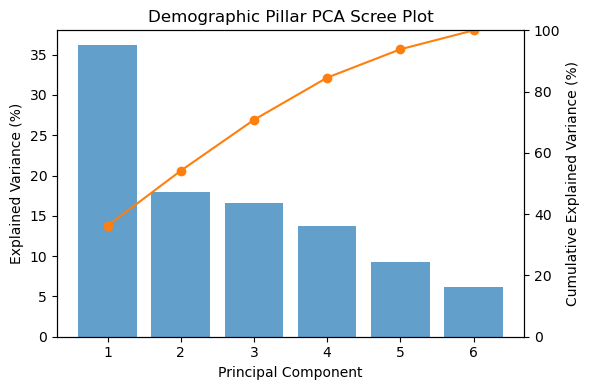


— Economic Pillar PCA —
 PC 1:  27.1%  (cumulative  27.1%)
 PC 2:  22.0%  (cumulative  49.1%)
 PC 3:  18.7%  (cumulative  67.9%)
 PC 4:  17.5%  (cumulative  85.4%)
 PC 5:  14.6%  (cumulative 100.0%)


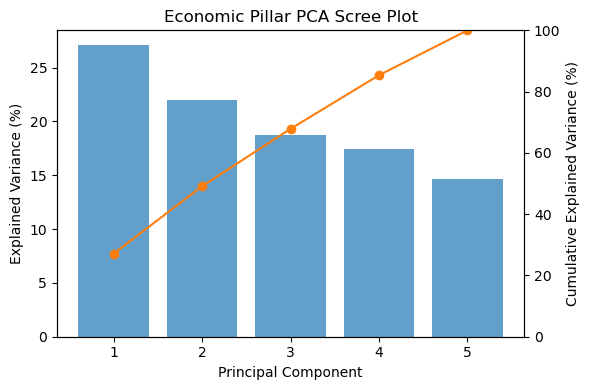


— Influence Pillar PCA —
 PC 1:  41.3%  (cumulative  41.3%)
 PC 2:  25.7%  (cumulative  66.9%)
 PC 3:  23.5%  (cumulative  90.4%)
 PC 4:   9.6%  (cumulative 100.0%)


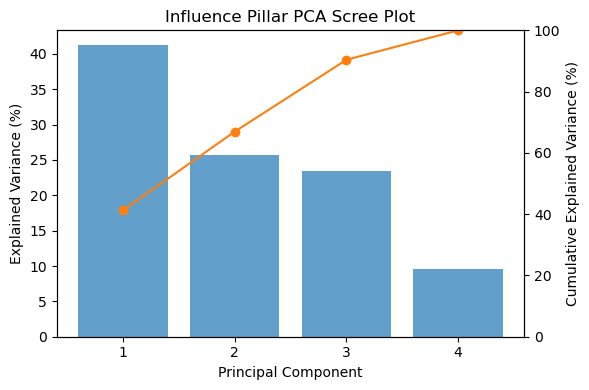

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor

# 1) Load scaled master table (from step 4)
scaled = pd.read_csv("data/clean/country_scaled_master.csv", index_col=None)
scaled = scaled.set_index("iso3")

# 2) Define your pillar columns again
demo_cols = ["total_population", "population_density", "urbanization_rate",
             "population_growth_pct", "literacy_rate_unesco", "life_expectancy"]
econ_cols = ["gdp_total_usd", "gdp_per_capita_ppp", "real_gdp_growth_pct",
             "inflation_pct_wb", "unemployment_rate"]
influ_cols = ["military_expenditure_pct_gdp", "military_expenditure_constusd",
              "wgi_gov_effectiveness", "Corruption_Perception_Index_2024_iso3"]

pillars = {
    "Demographic": demo_cols,
    "Economic"   : econ_cols,
    "Influence"  : influ_cols
}

# 3) Run PCA & plot for each pillar
for name, cols in pillars.items():
    X = scaled[cols].values  # already standardized
    
    # fit PCA
    pca = PCA(n_components=len(cols))
    pcs = pca.fit_transform(X)
    
    # explained variance
    evr = pca.explained_variance_ratio_
    cumvar = evr.cumsum()
    
    # print numeric summary
    print(f"\n— {name} Pillar PCA —")
    for i,(e,c) in enumerate(zip(evr, cumvar), start=1):
        print(f" PC{i:>2}: {e*100:5.1f}%  (cumulative {c*100:5.1f}%)")
    
    # plot scree + cumulative
    fig, ax1 = plt.subplots(figsize=(6,4))
    ax1.bar(range(1,len(cols)+1), evr*100, alpha=0.7, label="Individual")
    ax1.set_xlabel("Principal Component")
    ax1.set_ylabel("Explained Variance (%)")
    ax1.set_xticks(range(1,len(cols)+1))
    
    ax2 = ax1.twinx()
    ax2.plot(range(1,len(cols)+1), cumvar*100, color="C1", marker="o", label="Cumulative")
    ax2.set_ylabel("Cumulative Explained Variance (%)")
    ax2.set_ylim(0,100)
    
    ax1.set_title(f"{name} Pillar PCA Scree Plot")
    ax1.grid(False)
    ax2.grid(False)
    fig.tight_layout()
    plt.show()


In [4]:
n_demo = 4
n_econ = 4
n_inf  = 3

# 1a. Demographic PCs
pca_demo = PCA(n_components=n_demo)
demo_pcs = pca_demo.fit_transform(scaled[demo_cols])
demo_df  = pd.DataFrame(demo_pcs,
                        columns=[f"demo_pc{i+1}" for i in range(n_demo)],
                        index=scaled.index)

# 1b. Economic PCs
pca_econ = PCA(n_components=n_econ)
econ_pcs = pca_econ.fit_transform(scaled[econ_cols])
econ_df  = pd.DataFrame(econ_pcs,
                        columns=[f"econ_pc{i+1}" for i in range(n_econ)],
                        index=scaled.index)

# 1c. Influence PCs
pca_inf = PCA(n_components=n_inf)
inf_pcs = pca_inf.fit_transform(scaled[influ_cols])
inf_df  = pd.DataFrame(inf_pcs,
                       columns=[f"inf_pc{i+1}" for i in range(n_inf)],
                       index=scaled.index)

In [5]:
# Demographic loadings
demo_loadings = pd.DataFrame(
    pca_demo.components_.T,
    index=demo_cols,
    columns=[f"demo_pc{i+1}" for i in range(n_demo)]
)
print("Demographic PCA Loadings:\n", demo_loadings, "\n")

# Print variables with highest absolute loading for each PC
for pc in demo_loadings.columns:
    top = demo_loadings[pc].abs().sort_values(ascending=False).head(3).index.tolist()
    print(f"Top contributors to {pc}: {top}")
print("\n" + "="*60 + "\n")

Demographic PCA Loadings:
                        demo_pc1  demo_pc2  demo_pc3  demo_pc4
total_population      -0.052259 -0.383252  0.889573  0.228921
population_density     0.174583  0.651784  0.430248 -0.585919
urbanization_rate      0.507939  0.232757  0.025604  0.407894
population_growth_pct -0.320150  0.570191  0.039680  0.633669
literacy_rate_unesco   0.519359 -0.210459 -0.129977 -0.001369
life_expectancy        0.580136  0.068613  0.066496  0.190730 

Top contributors to demo_pc1: ['life_expectancy', 'literacy_rate_unesco', 'urbanization_rate']
Top contributors to demo_pc2: ['population_density', 'population_growth_pct', 'total_population']
Top contributors to demo_pc3: ['total_population', 'population_density', 'literacy_rate_unesco']
Top contributors to demo_pc4: ['population_growth_pct', 'population_density', 'urbanization_rate']




In [6]:
econ_loadings = pd.DataFrame(
    pca_econ.components_.T,
    index=econ_cols,
    columns=[f"econ_pc{i+1}" for i in range(n_econ)]
)
print("Economic PCA Loadings:\n", econ_loadings, "\n")
for pc in econ_loadings.columns:
    top = econ_loadings[pc].abs().sort_values(ascending=False).head(3).index.tolist()
    print(f"Top contributors to {pc}: {top}")
print("\n" + "="*60 + "\n")

Economic PCA Loadings:
                      econ_pc1  econ_pc2  econ_pc3  econ_pc4
gdp_total_usd        0.454782 -0.317691 -0.589006  0.462949
gdp_per_capita_ppp   0.652638 -0.060779  0.012710 -0.079597
real_gdp_growth_pct  0.240780  0.628789  0.393597  0.617918
inflation_pct_wb     0.396162  0.536472 -0.238349 -0.606635
unemployment_rate    0.390279 -0.460652  0.664215 -0.171798 

Top contributors to econ_pc1: ['gdp_per_capita_ppp', 'gdp_total_usd', 'inflation_pct_wb']
Top contributors to econ_pc2: ['real_gdp_growth_pct', 'inflation_pct_wb', 'unemployment_rate']
Top contributors to econ_pc3: ['unemployment_rate', 'gdp_total_usd', 'real_gdp_growth_pct']
Top contributors to econ_pc4: ['real_gdp_growth_pct', 'inflation_pct_wb', 'gdp_total_usd']




In [7]:
inf_loadings = pd.DataFrame(
    pca_inf.components_.T,
    index=influ_cols,
    columns=[f"inf_pc{i+1}" for i in range(n_inf)]
)
print("Influence PCA Loadings:\n", inf_loadings, "\n")
for pc in inf_loadings.columns:
    top = inf_loadings[pc].abs().sort_values(ascending=False).head(3).index.tolist()
    print(f"Top contributors to {pc}: {top}")

Influence PCA Loadings:
                                         inf_pc1   inf_pc2   inf_pc3
military_expenditure_pct_gdp           0.009970  0.864382  0.495265
military_expenditure_constusd         -0.240733 -0.480139  0.843504
wgi_gov_effectiveness                  0.685216 -0.144899  0.116311
Corruption_Perception_Index_2024_iso3  0.687333 -0.036249  0.172293 

Top contributors to inf_pc1: ['Corruption_Perception_Index_2024_iso3', 'wgi_gov_effectiveness', 'military_expenditure_constusd']
Top contributors to inf_pc2: ['military_expenditure_pct_gdp', 'military_expenditure_constusd', 'wgi_gov_effectiveness']
Top contributors to inf_pc3: ['military_expenditure_constusd', 'military_expenditure_pct_gdp', 'Corruption_Perception_Index_2024_iso3']


In [8]:
# Weighted sum of retained PCs
demo_score_pc1 = demo_df["demo_pc1"]
demo_weights    = pca_demo.explained_variance_ratio_[:n_demo]
demo_score_wsum = demo_df.mul(demo_weights, axis=1).sum(axis=1)

econ_score_pc1  = econ_df["econ_pc1"]
econ_weights    = pca_econ.explained_variance_ratio_[:n_econ]
econ_score_wsum = econ_df.mul(econ_weights, axis=1).sum(axis=1)

inf_score_pc1   = inf_df["inf_pc1"]
inf_weights     = pca_inf.explained_variance_ratio_[:n_inf]
inf_score_wsum  = inf_df.mul(inf_weights, axis=1).sum(axis=1)


In [9]:
# # Combine into a single dataframe 1ST PASS
# pillar_scores = pd.DataFrame({
#     "demo_score_pc1":   demo_score_pc1,
#     "demo_score_wsum":  demo_score_wsum,
#     "econ_score_pc1":   econ_score_pc1,
#     "econ_score_wsum":  econ_score_wsum,
#     "inf_score_pc1":    inf_score_pc1,
#     "inf_score_wsum":   inf_score_wsum
# }, index=scaled.index)

# # pillar_scores.to_csv("data/clean/pillar_scores.csv", index=True)
# composite_scores = pillar_scores[["demo_score_wsum","econ_score_wsum","inf_score_wsum"]]
# # composite_scores.to_csv("data/clean/composite_scores.csv")

In [10]:
# Recompute weighted‐sum pillar scores
pillar_scores = pd.DataFrame(index=scaled.index)

for prefix, pcs_df, pca_obj, n in [
    ("demo", demo_df, pca_demo, n_demo),
    ("econ", econ_df, pca_econ, n_econ),
    ("inf",  inf_df,  pca_inf,  n_inf),
]:
    weights = pca_obj.explained_variance_ratio_[:n]
    pillar_scores[f"{prefix}_wsum"] = pcs_df.mul(weights, axis=1).sum(axis=1)

pillar_scores["composite_score"] = pillar_scores.mean(axis=1)

pillar_scores["rank"] = pillar_scores["composite_score"] \
    .rank(ascending=False, method="first")

#pillar_scores.to_csv("data/clean/pillar_scores_and_composite.csv")

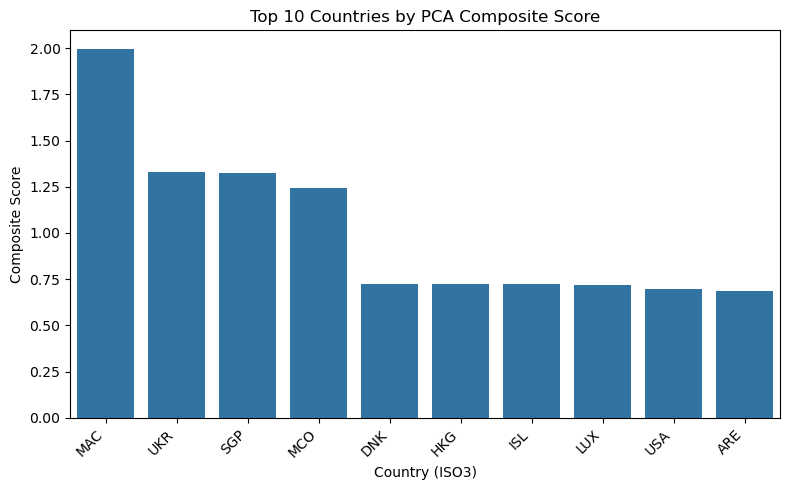

In [12]:
# Verify sorting and ensure top 10
top10 = pillar_scores.nlargest(10, "composite_score")

plt.figure(figsize=(8,5))
sns.barplot(data=top10, x=top10.index, y="composite_score", order=top10.sort_values("composite_score", ascending=False).index)
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Countries by PCA Composite Score")
plt.ylabel("Composite Score")
plt.xlabel("Country (ISO3)")
plt.tight_layout()
plt.show()


In [ ]:
# pd.DataFrame({
#   "iso3": scaled.index,
#   "final_score": pillar_scores["composite_score"],
#   "rank": pillar_scores["composite_score"].rank(ascending=False)
# }).to_csv("data/clean/final_pca_index.csv", index=False)
